In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import CategoricalNB 

In [4]:
model = CategoricalNB(alpha = 0.0001)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=0.0001)

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)

[2 0 2 ... 2 2 2]
       0
10990  2
6678   0
6222   2
35825  0
11848  2
...   ..
3384   2
22535  0
26670  2
31395  2
32964  2

[8819 rows x 1 columns]


In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.8246966776278489
              precision    recall  f1-score   support

           0   0.710128  0.759651  0.734055      1606
           1   0.596366  0.629651  0.612557      1720
           2   0.940397  0.904788  0.922249      5493

    accuracy                       0.824697      8819
   macro avg   0.748964  0.764697  0.756287      8819
weighted avg   0.831366  0.824697  0.827577      8819



In [7]:
model.predict_proba(X_test)

array([[2.12428685e-09, 1.81802653e-09, 9.99999996e-01],
       [7.41217639e-01, 1.50650652e-01, 1.08131709e-01],
       [1.24906261e-10, 5.66851761e-10, 9.99999999e-01],
       ...,
       [3.94135759e-11, 3.61617087e-09, 9.99999996e-01],
       [1.03528485e-01, 3.64097633e-01, 5.32373882e-01],
       [8.81490956e-09, 1.65287041e-08, 9.99999975e-01]])

[2 0 2 ... 2 2 2]
       0
10990  2
6678   0
6222   2
35825  0
11848  2
...   ..
3384   2
22535  0
26670  2
31395  2
32964  2

[8819 rows x 1 columns]


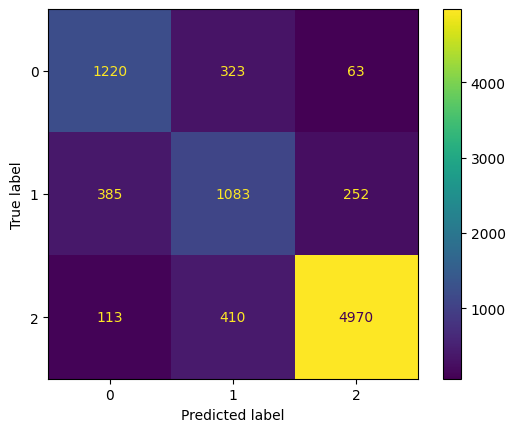

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res = np.array(res)
print(res)
print(Y_test)
cm = confusion_matrix(Y_test, res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 8820it [28:21,  5.18it/s]                          


(8819, 22)


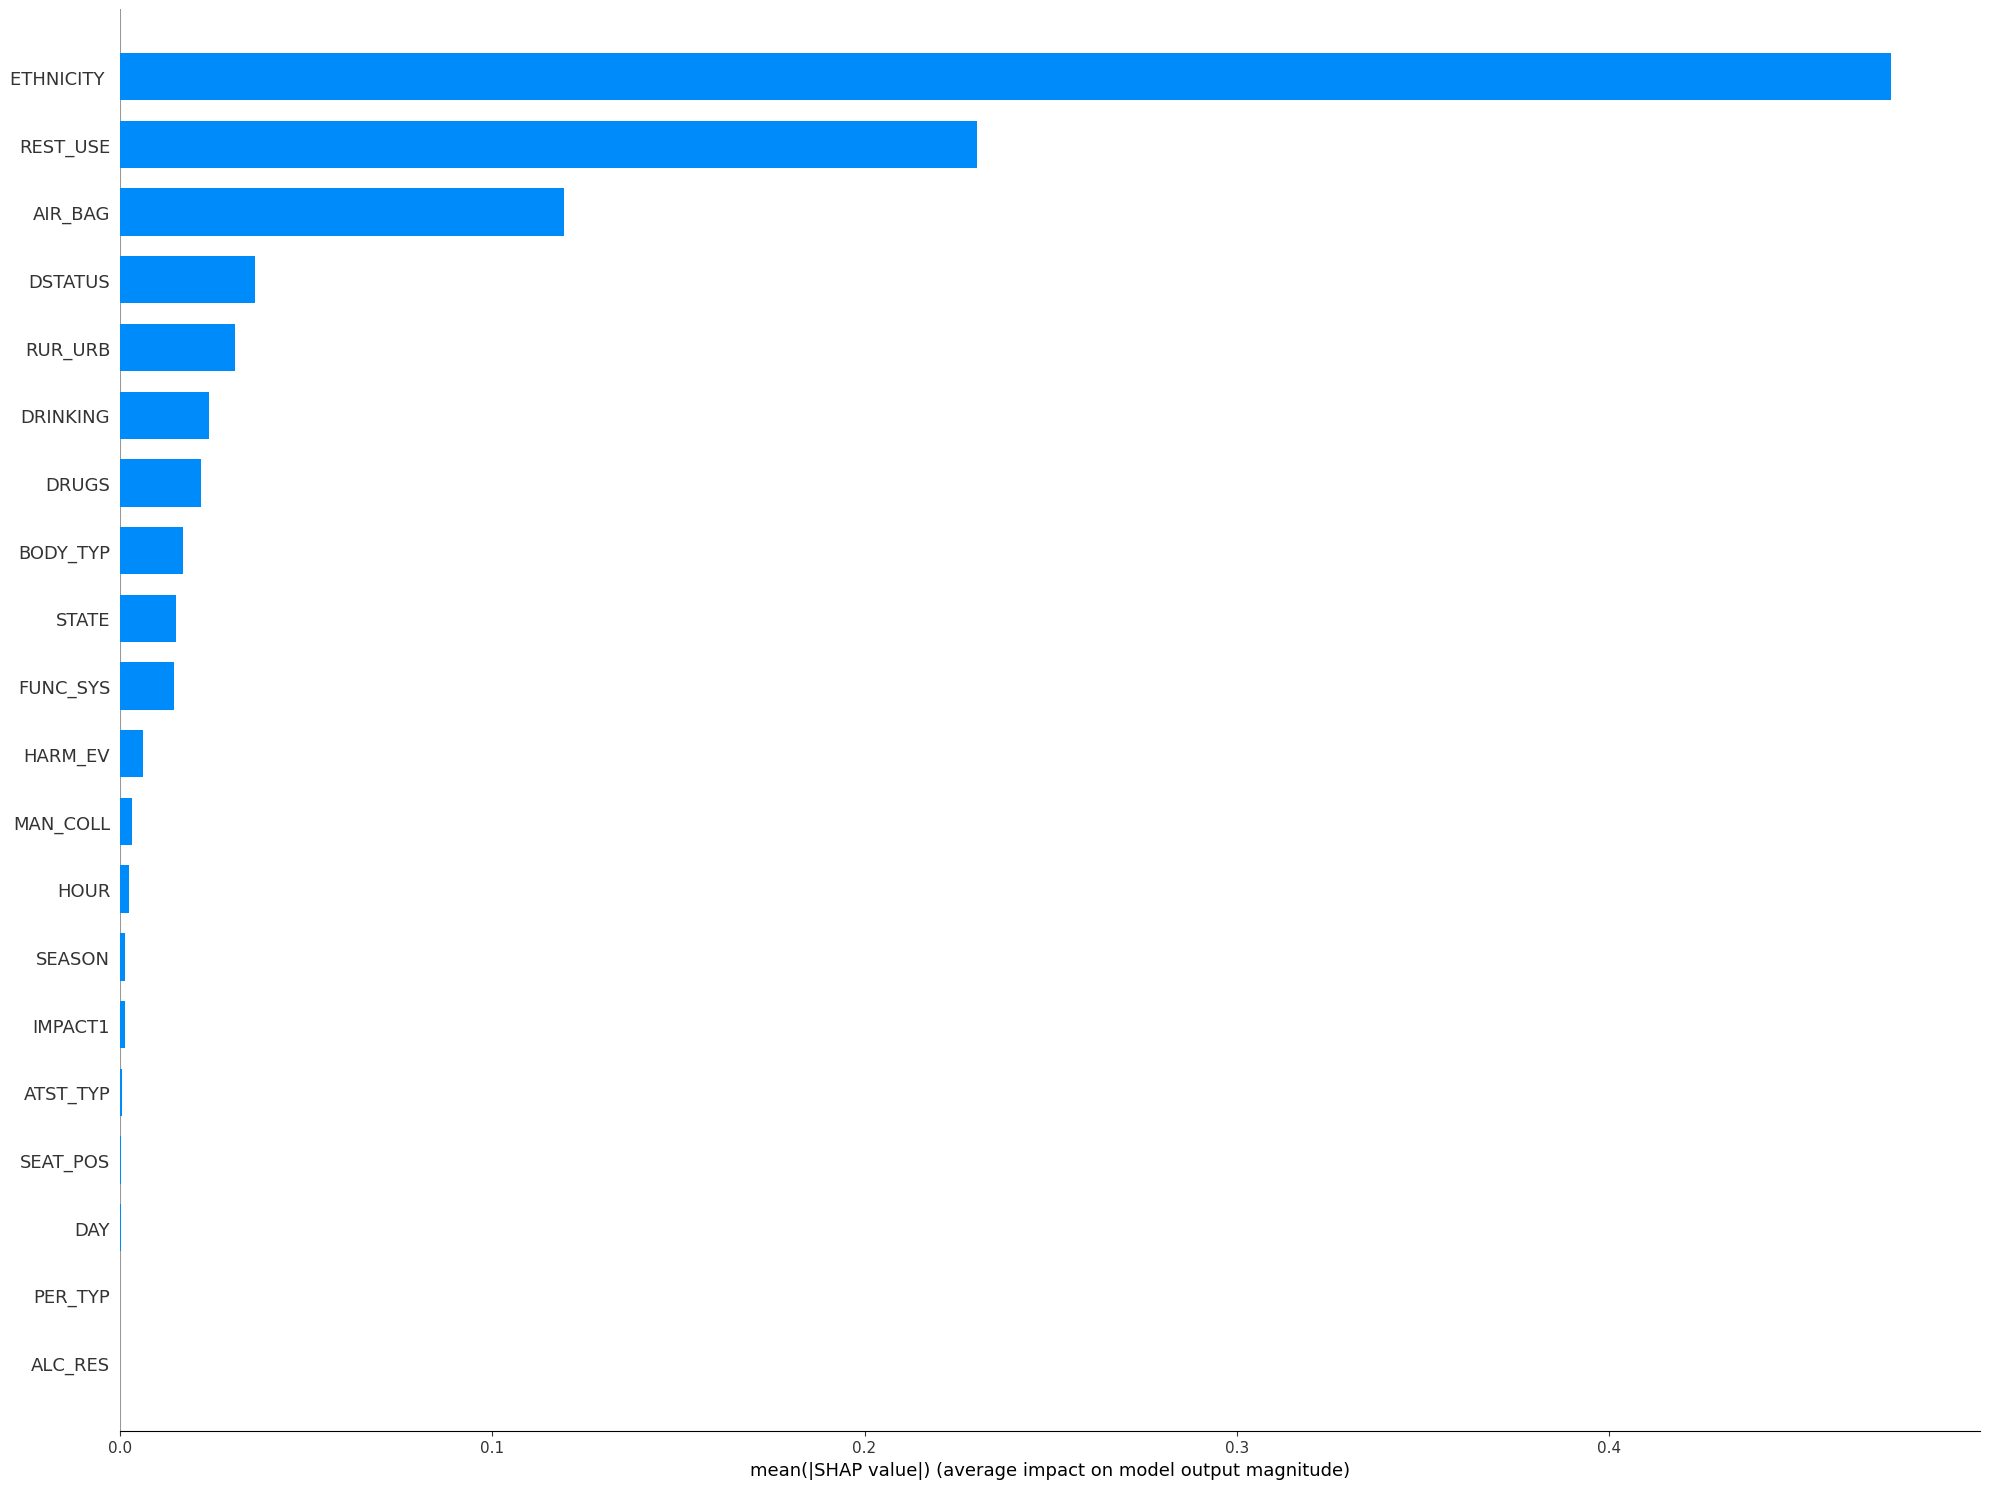

In [9]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
print(shap_values.shape)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)


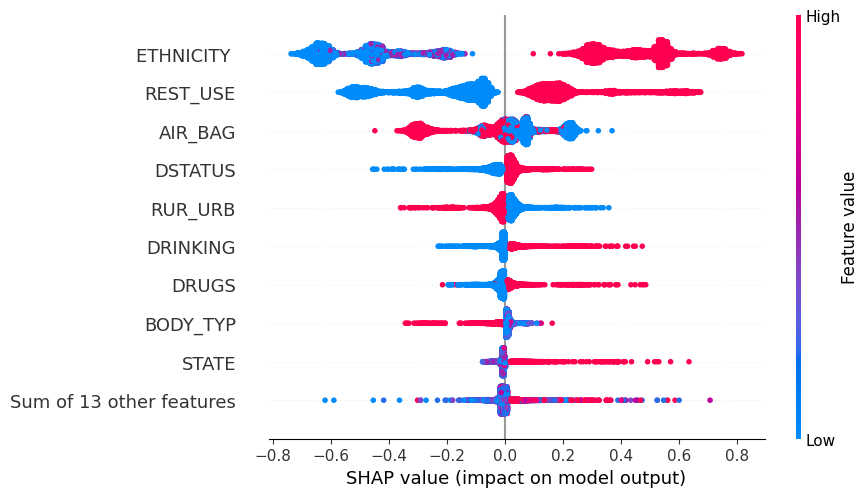

In [10]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

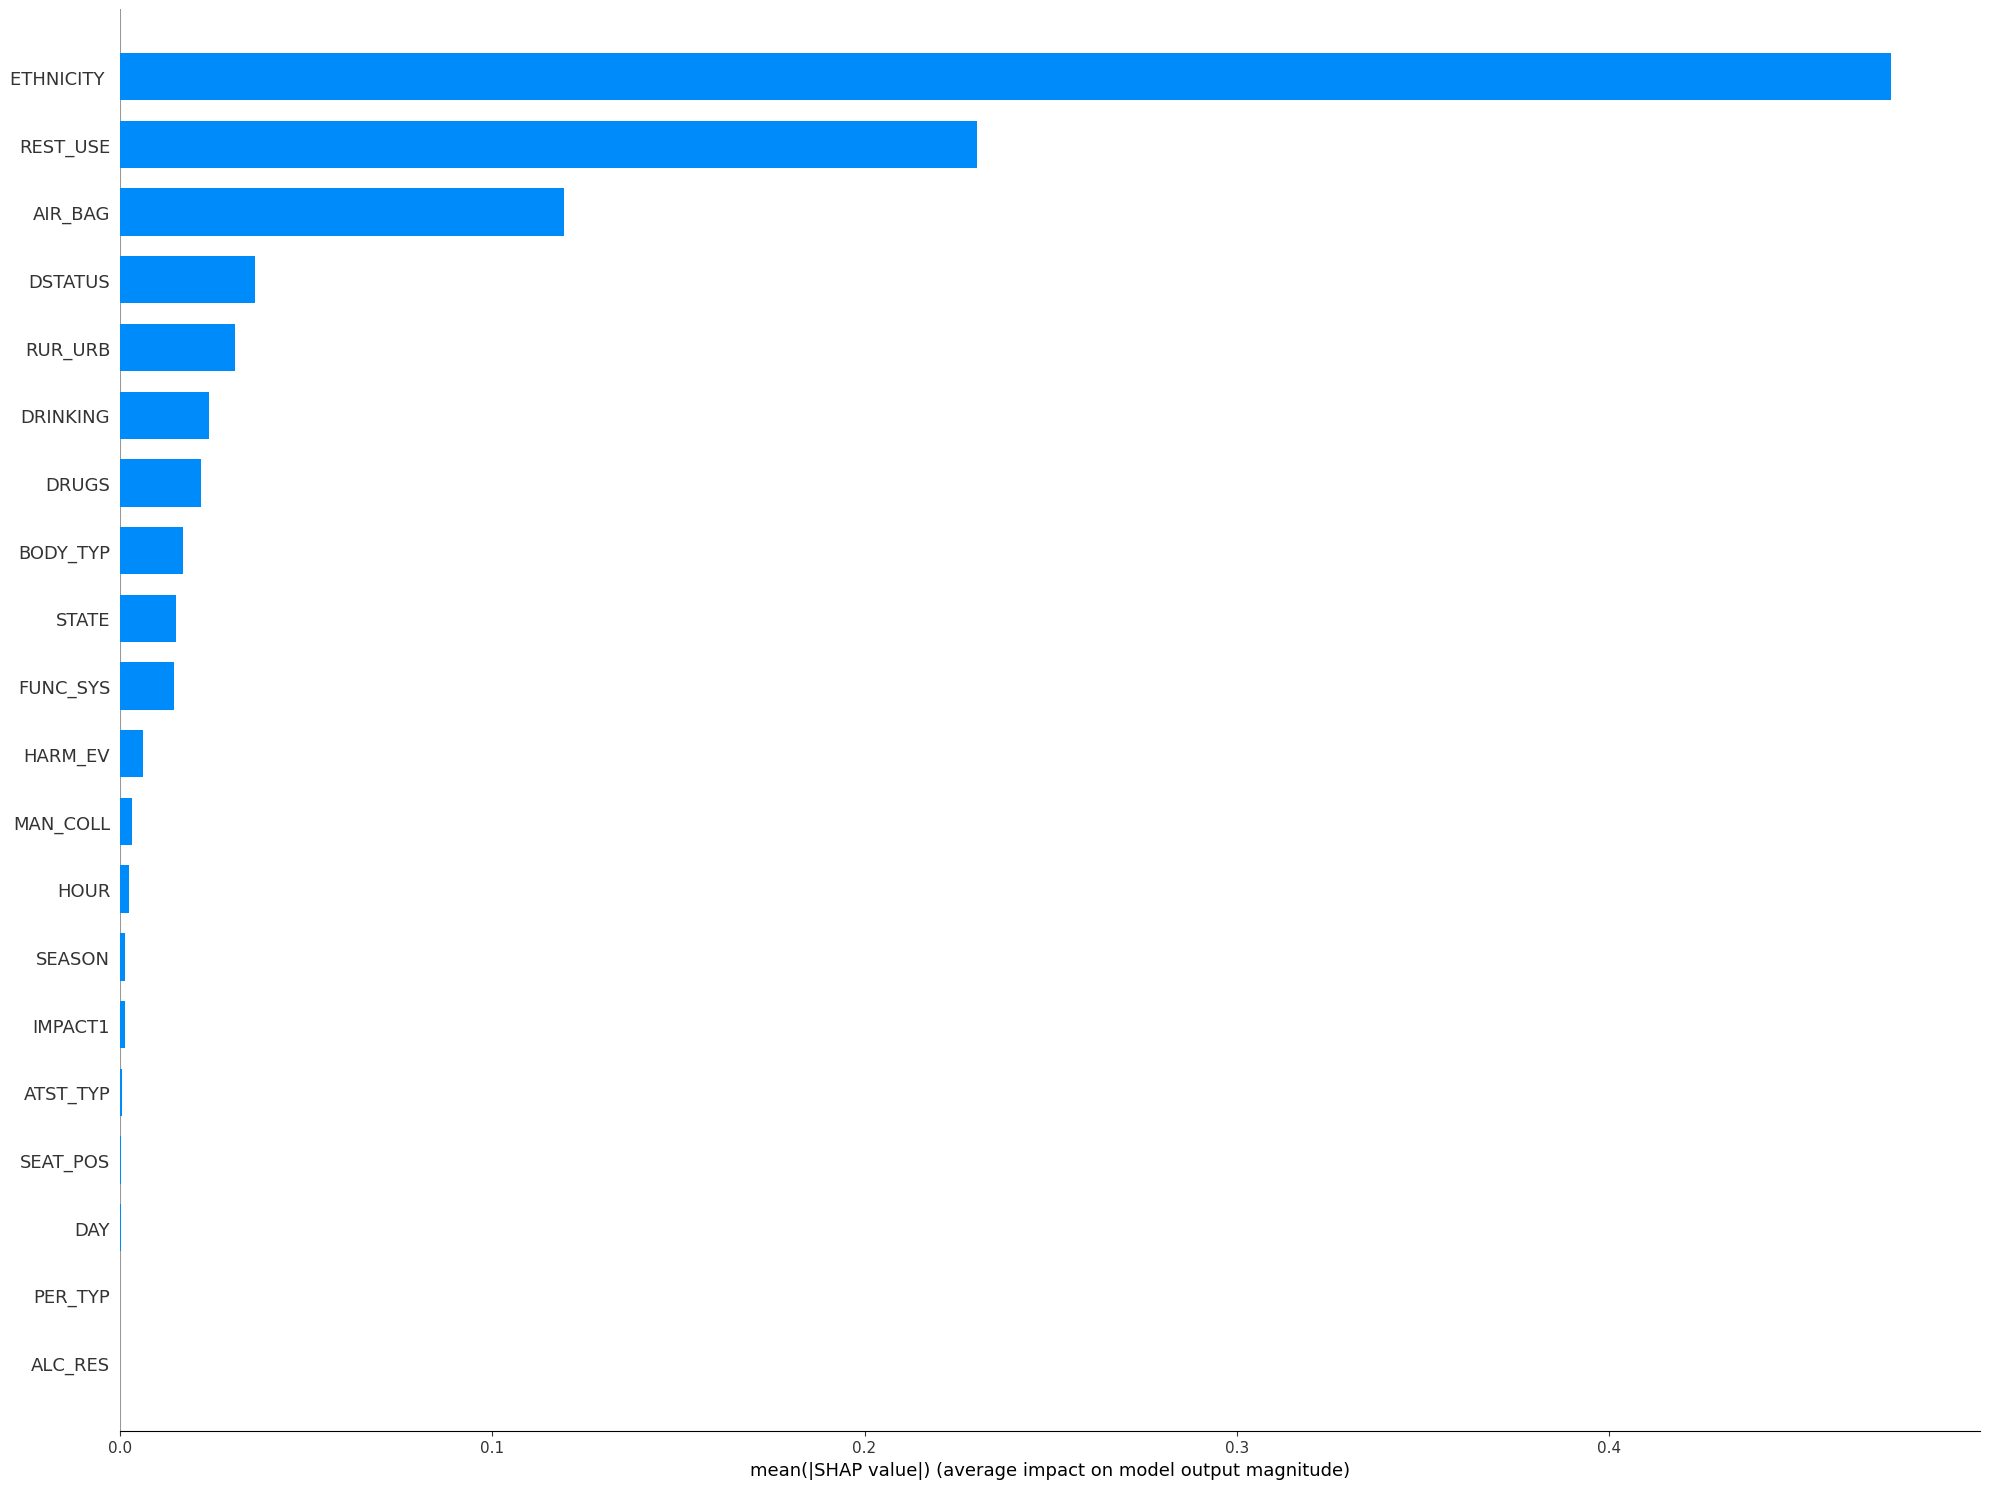

In [11]:
shap.summary_plot(shap_values.values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

In [12]:
print(shap_values.values)

[[-0.00590909 -0.00045455  0.         ... -0.01681818 -0.00727273
   0.        ]
 [ 0.02727273  0.          0.         ...  0.02681818  0.03863636
   0.00136364]
 [ 0.03045455 -0.00045455  0.         ... -0.01181818  0.03227273
   0.        ]
 ...
 [-0.00636364  0.00272727  0.         ...  0.03       -0.01090909
   0.        ]
 [-0.01409091  0.01318182  0.         ...  0.08772727 -0.02227273
  -0.00090909]
 [-0.00363636  0.          0.         ... -0.00363636 -0.00363636
   0.        ]]


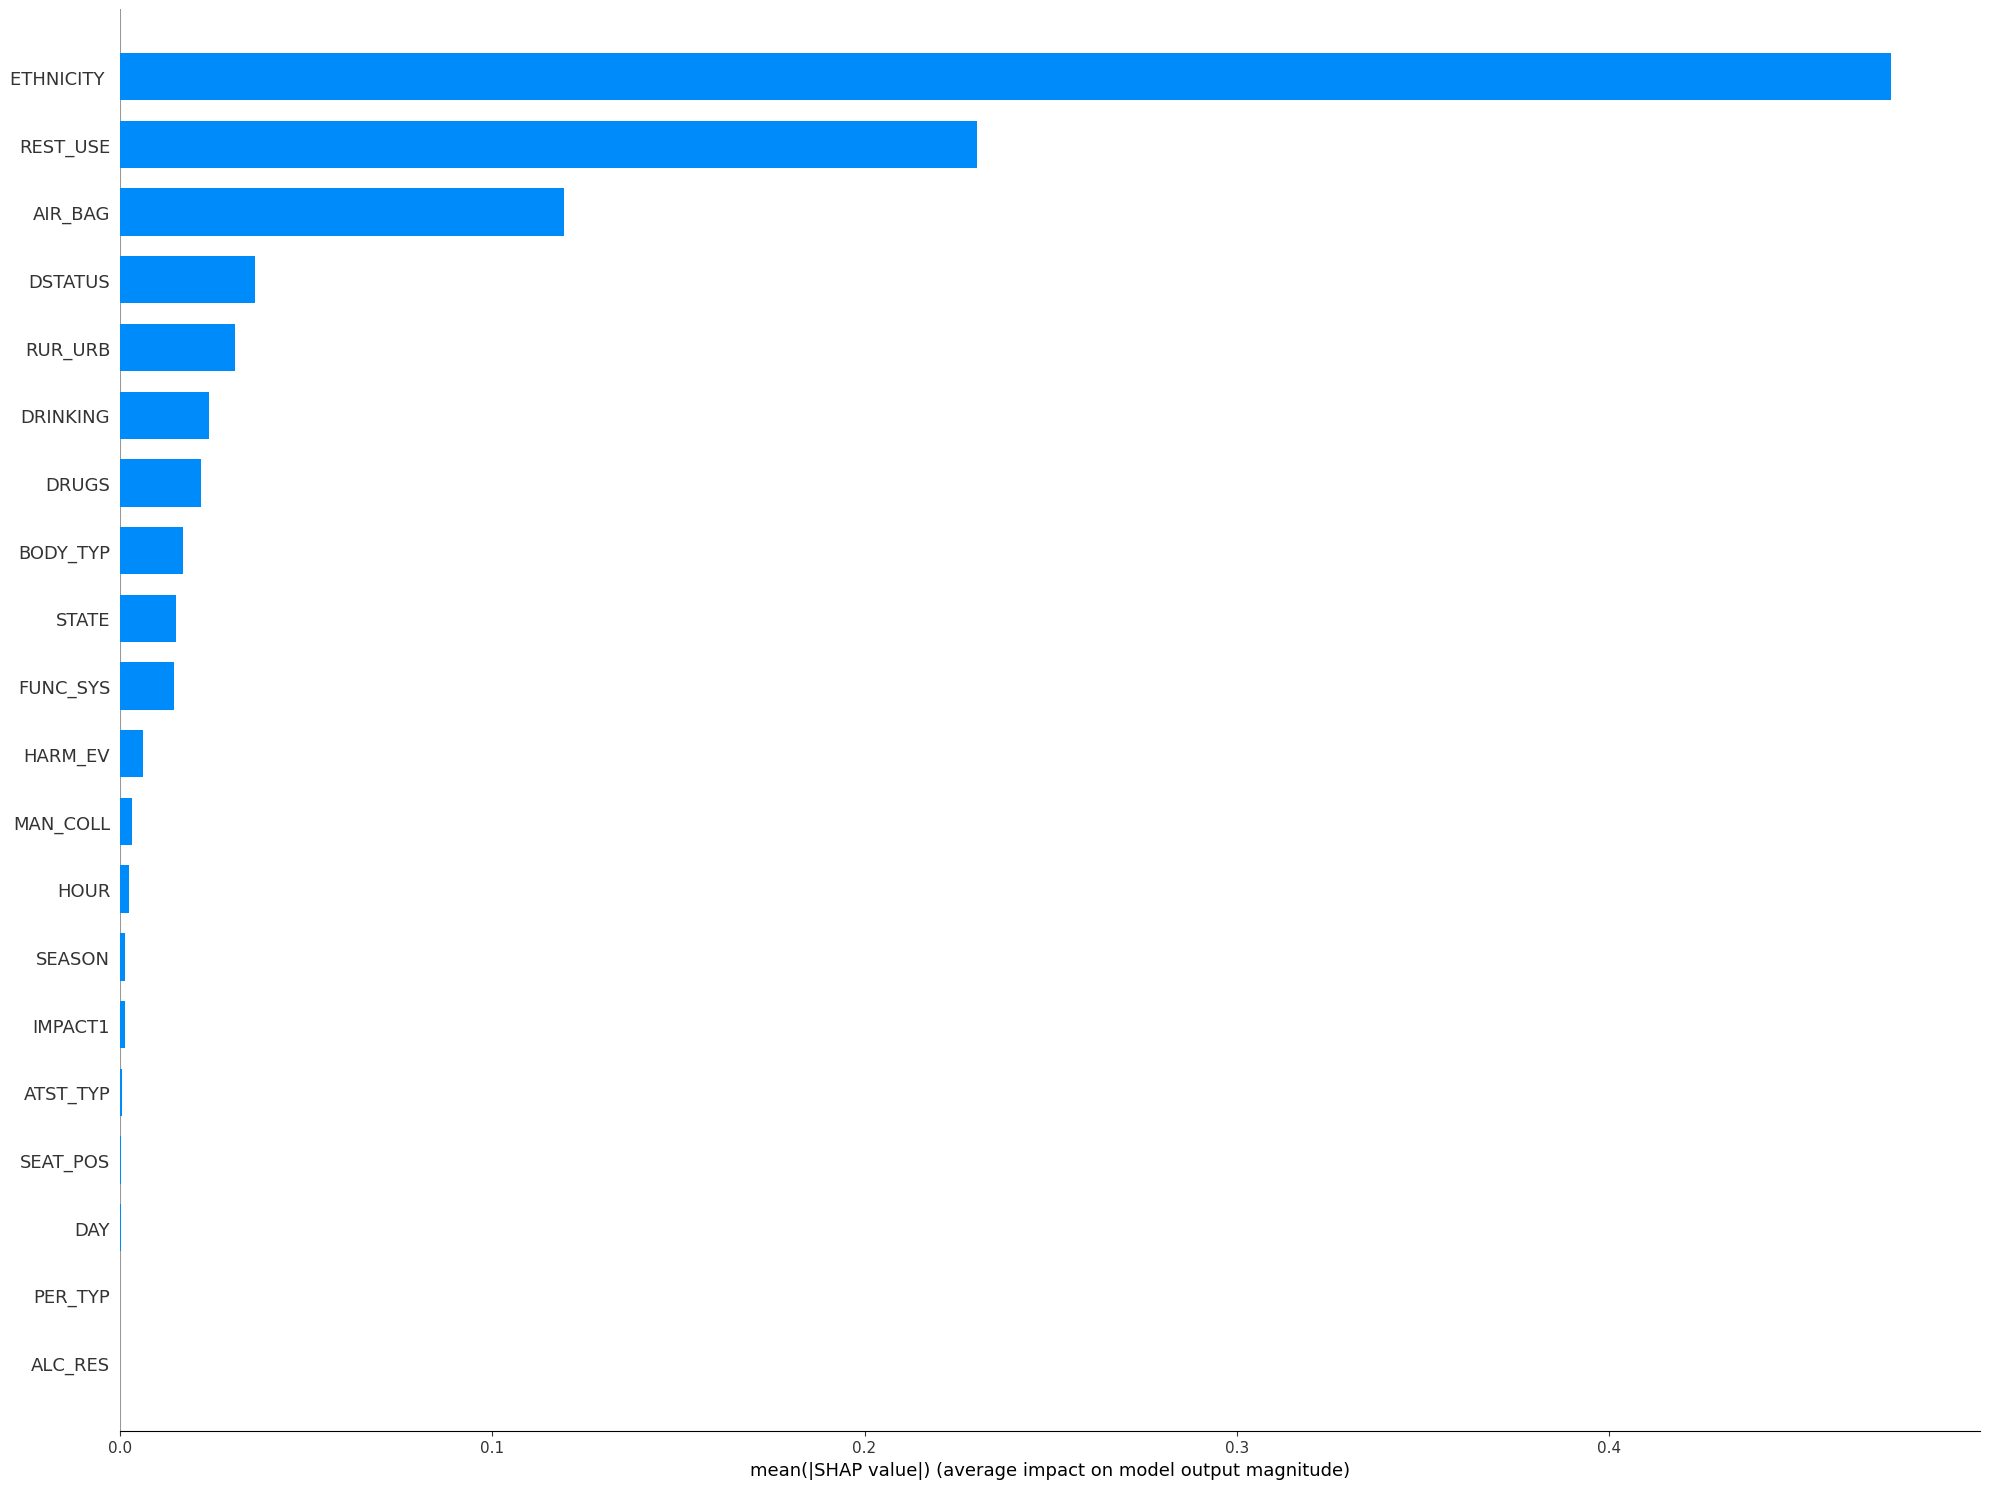

In [13]:
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)